<a href="https://www.kaggle.com/code/dandrandandran2093/machine-learning-clustering-models?scriptVersionId=278477664" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🔍 INSTRUCTION
1. [K-Means Clustering](#1)
2. [Hierarchical Clustering](#2)

# 📊 Data Exploration

## What is Clustering?
Clustering is an **unsupervised learning** technique that groups similar data points together without predefined labels. It discovers patterns and structures in data.

## Supervised vs Unsupervised Learning:
- **Supervised**: Has labels (y) - Classification & Regression
- **Unsupervised**: No labels - Clustering & Dimensionality Reduction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"

# machine learning
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="1"></a>
# K-Means Clustering

### What is K-Means Clustering?
An **unsupervised learning algorithm** that partitions data into **K distinct clusters** based on feature similarity.
**"Means"** refers to calculating the average (centroid) of data points in each cluster!

---

### Algorithm Steps
$$\text{Minimize: } \sum_{i=1}^{K}\sum_{x \in C_i}||x - \mu_i||^2$$

**Simple terms:**
1. Choose number of clusters (K)
2. Randomly initialize K centroids
3. Assign each point to nearest centroid
4. Update centroids (mean of assigned points)
5. Repeat steps 3-4 until convergence

---

### Elbow Method
Used to find optimal K value by plotting:
- **X-axis:** Number of clusters (K)
- **Y-axis:** Within-Cluster Sum of Squares (WCSS)
- **Elbow Point:** Where WCSS decrease rate slows down

---

### Key Parameters
- **n_clusters:** Number of clusters (K)
- **init:** Centroid initialization method ('k-means++' recommended)
- **max_iter:** Maximum iterations (default: 300)
- **random_state:** For reproducibility

---

### Pros & Cons
**Advantages:**
- Fast and efficient
- Works well with large datasets
- Simple to implement and interpret
- Scales well to high dimensions

**Disadvantages:**
- Need to specify K beforehand
- Sensitive to initial centroid positions
- Assumes spherical clusters
- Affected by outliers

## Create Synthetic Dataset

In [2]:
# Create Dataset
# Class 1 (Bottom-left cluster)
x1 = np.random.normal(25, 5, 1000)  # mean=25, std=5, 1000 points
y1 = np.random.normal(25, 5, 1000)

# Class 2 (Top-right cluster)
x2 = np.random.normal(55, 5, 1000)
y2 = np.random.normal(60, 5, 1000)

# Class 3 (Bottom-right cluster)
x3 = np.random.normal(55, 5, 1000)
y3 = np.random.normal(15, 5, 1000)

# Combine all clusters
x = np.concatenate((x1, x2, x3), axis=0)
y = np.concatenate((y1, y2, y3), axis=0)

# Create DataFrame
dictionary = {"x": x, "y": y}
data = pd.DataFrame(dictionary)

In [3]:
data.head()

,x,y
0,24.856619,23.197472
1,26.909519,23.519535
2,28.204926,20.264533
3,22.240441,25.896649
4,24.247119,31.624279


In [4]:
data.describe()

,x,y
count,3000.000000,3000.000000
mean,44.776147,33.292970
std,15.037056,19.944622
min,6.367719,0.388962
25%,28.031456,17.145937
50%,51.412769,25.198171
75%,56.236687,56.779565
max,73.323680,73.814071


## Visualize Ground Truth (Separated Clusters)

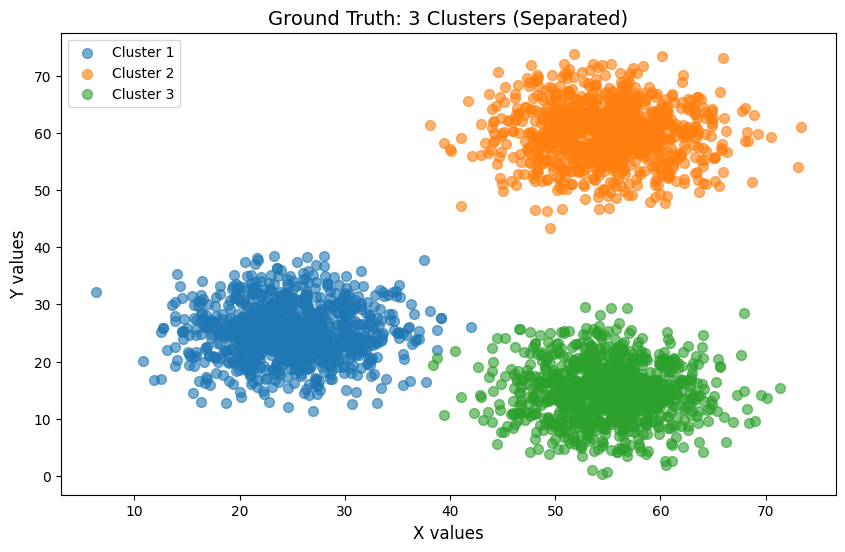

In [5]:
# Plot Data with True Labels
plt.figure(figsize=(10, 6))
plt.scatter(x1, y1, alpha=0.6, label='Cluster 1', s=50)
plt.scatter(x2, y2, alpha=0.6, label='Cluster 2', s=50)
plt.scatter(x3, y3, alpha=0.6, label='Cluster 3', s=50)
plt.xlabel("X values", fontsize=12)
plt.ylabel("Y values", fontsize=12)
plt.title("Ground Truth: 3 Clusters (Separated)", fontsize=14)
plt.legend()
plt.show()

## Visualize Combined Data

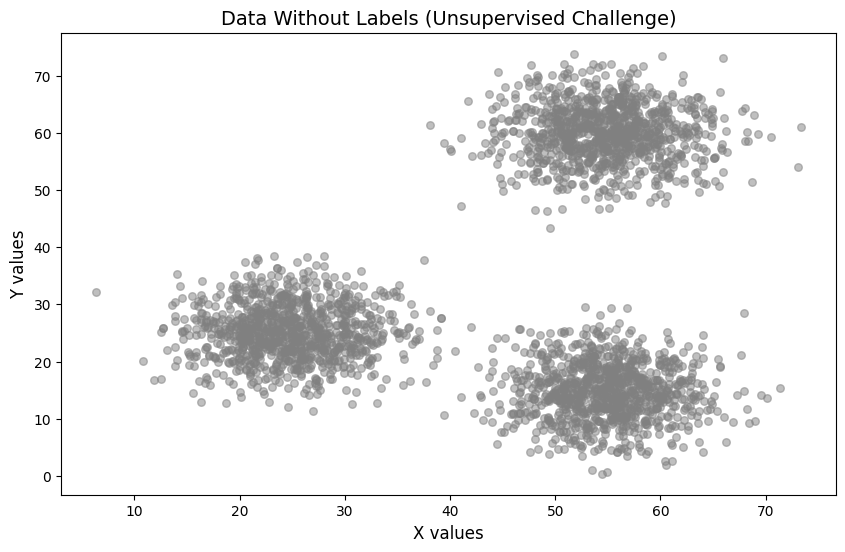

In [6]:
# Plot Actual Data (Without Labels - What K-Means Sees)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, s=30, c='gray')
plt.xlabel("X values", fontsize=12)
plt.ylabel("Y values", fontsize=12)
plt.title("Data Without Labels (Unsupervised Challenge)", fontsize=14)
plt.show()

## Elbow Method - Finding Optimal K

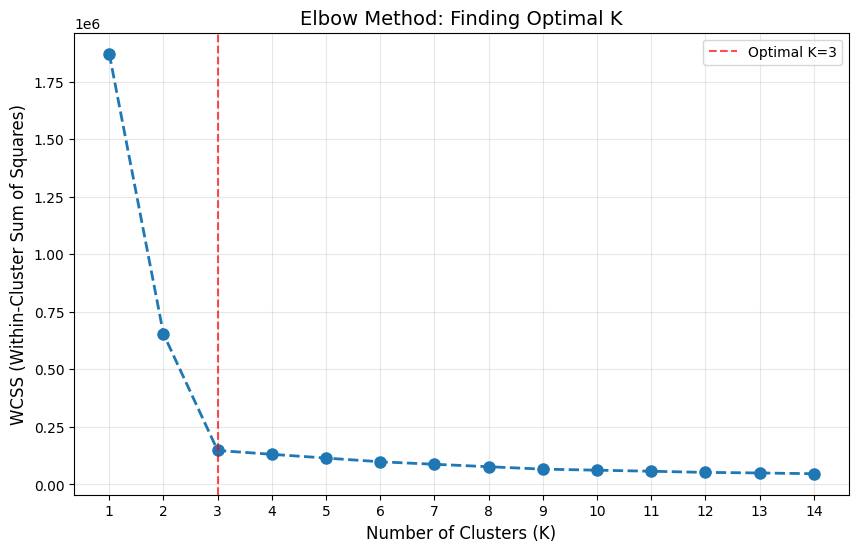

In [7]:
# KMeans - Calculate WCSS for different K values
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("WCSS (Within-Cluster Sum of Squares)", fontsize=12)
plt.title("Elbow Method: Finding Optimal K", fontsize=14)
plt.xticks(range(1, 15))
plt.grid(True, alpha=0.3)
plt.axvline(x=3, color='r', linestyle='--', label='Optimal K=3', alpha=0.7)
plt.legend()
plt.show()

## K-Means with K=3

In [8]:
# K equals 3 model
kmeans2 = KMeans(n_clusters=3, random_state=42)
clusters = kmeans2.fit_predict(data)

# Add cluster labels
data["label"] = clusters

print("First 5 samples with cluster labels:")
print(data.head())
print("-" * 50)
print("Last 5 samples with cluster labels:")
print(data.tail())

First 5 samples with cluster labels:
           x          y  label
0  24.856619  23.197472      0
1  26.909519  23.519535      0
2  28.204926  20.264533      0
3  22.240441  25.896649      0
4  24.247119  31.624279      0
--------------------------------------------------
Last 5 samples with cluster labels:
              x          y  label
2995  71.340229  15.308711      2
2996  61.299140  20.649540      2
2997  58.287872  15.450296      2
2998  55.950197  16.596469      2
2999  50.225404  23.327043      2


## K-Means Results Visualization

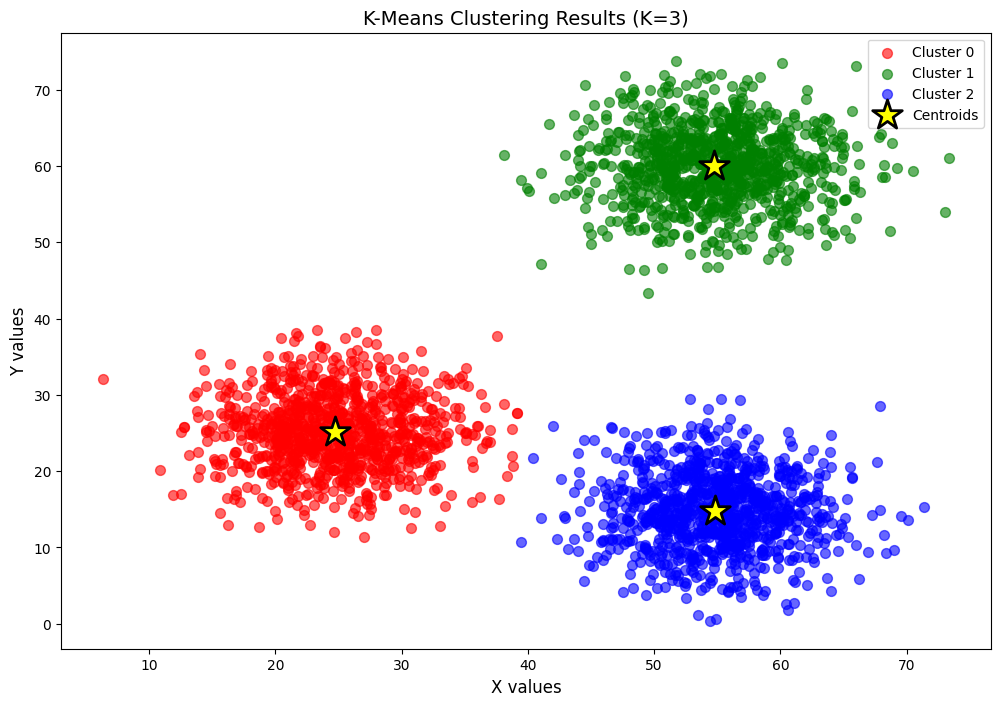


Cluster Centers:
[[24.74845707 25.14600643]
 [54.77608033 59.96358693]
 [54.83399042 14.75892981]]


In [9]:
# Plot K-Means Results
plt.figure(figsize=(12, 8))

plt.scatter(data.x[data.label == 0], data.y[data.label == 0], 
           color="red", label="Cluster 0", alpha=0.6, s=50)
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], 
           color="green", label="Cluster 1", alpha=0.6, s=50)
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], 
           color="blue", label="Cluster 2", alpha=0.6, s=50)

# Plot centroids
plt.scatter(kmeans2.cluster_centers_[:, 0], 
           kmeans2.cluster_centers_[:, 1], 
           color="yellow", marker='*', s=500, 
           edgecolors='black', linewidths=2,
           label="Centroids", zorder=5)

plt.xlabel("X values", fontsize=12)
plt.ylabel("Y values", fontsize=12)
plt.title("K-Means Clustering Results (K=3)", fontsize=14)
plt.legend(fontsize=10)
plt.show()

print(f"\nCluster Centers:\n{kmeans2.cluster_centers_}")

<a id="2"></a>
# Hierarchical Clustering

### What is Hierarchical Clustering?
A **clustering method** that builds a **hierarchy of clusters** without specifying K beforehand.
**"Hierarchical"** because it creates a tree-like structure (dendrogram) showing relationships!

---

### Types & Algorithm
$$\text{Distance: } d(C_i, C_j) = \min_{x \in C_i, y \in C_j} ||x - y||$$

**Two Approaches:**
- **Agglomerative (Bottom-up):** Start with individual points, merge similar ones
- **Divisive (Top-down):** Start with one cluster, split recursively

**Linkage Methods:**
- **Single:** Minimum distance between clusters
- **Complete:** Maximum distance between clusters
- **Average:** Average distance between all points
- **Ward:** Minimizes within-cluster variance *(most common)*

---

### Dendrogram
Visual representation of hierarchical clustering:
- **Y-axis:** Distance/dissimilarity
- **X-axis:** Data points
- **Horizontal line:** Cutting line to determine number of clusters

---

### Key Parameters
- **n_clusters:** Number of clusters (can be determined from dendrogram)
- **linkage:** Method to calculate distance ('ward', 'complete', 'average')
- **affinity:** Distance metric ('euclidean', 'manhattan', 'cosine')

---

### Pros & Cons
**Advantages:**
- No need to specify K beforehand
- Produces dendrogram for visualization
- Works with any distance metric
- Captures hierarchical relationships

**Disadvantages:**
- Computationally expensive (O(n³))
- Not suitable for large datasets
- Sensitive to noise and outliers
- Once merged, cannot undo (agglomerative)

## Create Smaller Dataset (For Performance)

**Note:** Hierarchical clustering is computationally expensive, so we use a smaller dataset (100 points per cluster instead of 1000)

In [10]:
# Create Dataset (smaller for hierarchical - 100 points per cluster)
# Class 1
x1_ = np.random.normal(25, 5, 100)
y1_ = np.random.normal(25, 5, 100)

# Class 2
x2_ = np.random.normal(55, 5, 100)
y2_ = np.random.normal(60, 5, 100)

# Class 3
x3_ = np.random.normal(55, 5, 100)
y3_ = np.random.normal(15, 5, 100)

x_ = np.concatenate((x1_, x2_, x3_), axis=0)
y_ = np.concatenate((y1_, y2_, y3_), axis=0)

dictionary_ = {"x": x_, "y": y_}
data_ = pd.DataFrame(dictionary_)

print(f"Dataset size for Hierarchical Clustering: {len(data_)} points")
print(f"(Smaller than K-Means for computational efficiency)")

Dataset size for Hierarchical Clustering: 300 points
(Smaller than K-Means for computational efficiency)


## Dendrogram Visualization

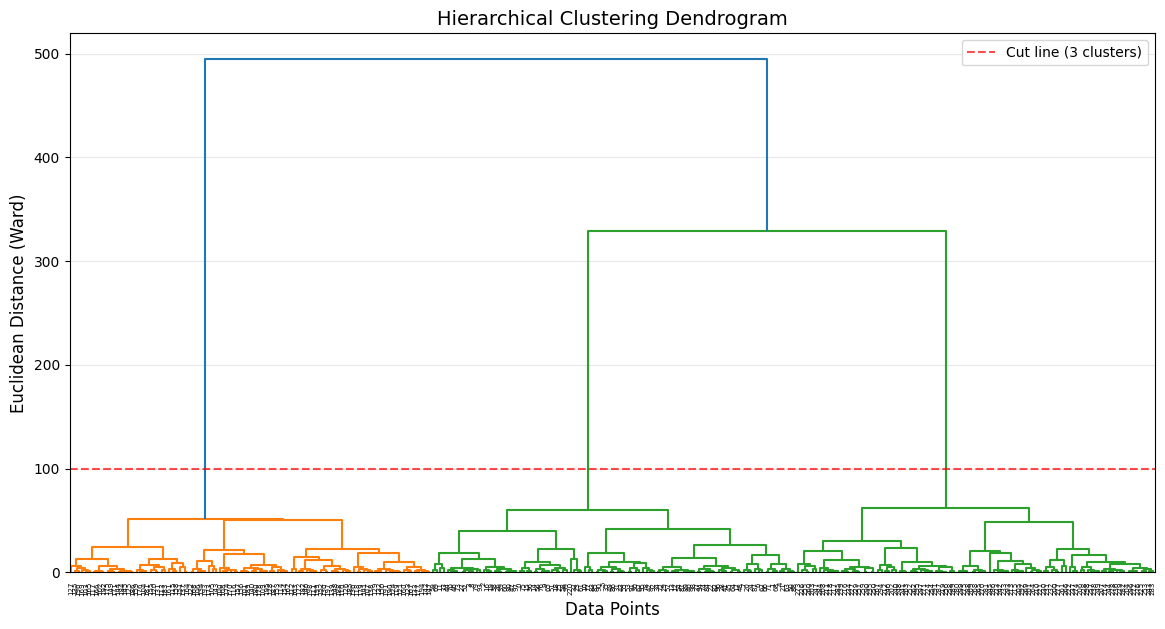


💡 Insight: The dendrogram clearly shows 3 distinct clusters!


In [11]:
# Create linkage matrix
merg = linkage(data_, method="ward")

# Plot Dendrogram
plt.figure(figsize=(14, 7))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("Euclidean Distance (Ward)", fontsize=12)
plt.title("Hierarchical Clustering Dendrogram", fontsize=14)
plt.axhline(y=100, color='r', linestyle='--', label='Cut line (3 clusters)', alpha=0.7)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.show()

print("\n💡 Insight: The dendrogram clearly shows 3 distinct clusters!")

## Hierarchical Clustering with K=3

In [12]:
# Hierarchical Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
cluster = hierarchical_cluster.fit_predict(data_)

# Add cluster labels
data_["label"] = cluster

print(f"\nCluster Distribution:")
print(data_['label'].value_counts().sort_index())


Cluster Distribution:
label
0     99
1    100
2    101
Name: count, dtype: int64


## Hierarchical Clustering Results

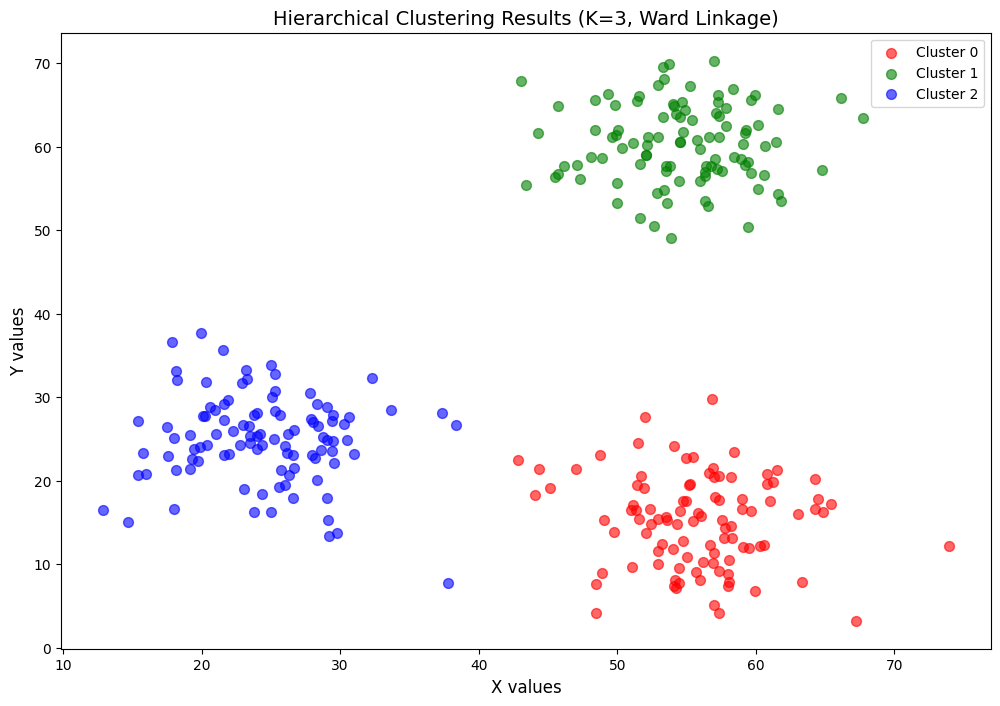

In [13]:
# Plot Hierarchical Clustering Results
plt.figure(figsize=(12, 8))

plt.scatter(data_.x[data_.label == 0], data_.y[data_.label == 0], 
           color="red", label="Cluster 0", alpha=0.6, s=50)
plt.scatter(data_.x[data_.label == 1], data_.y[data_.label == 1], 
           color="green", label="Cluster 1", alpha=0.6, s=50)
plt.scatter(data_.x[data_.label == 2], data_.y[data_.label == 2], 
           color="blue", label="Cluster 2", alpha=0.6, s=50)

plt.xlabel("X values", fontsize=12)
plt.ylabel("Y values", fontsize=12)
plt.title("Hierarchical Clustering Results (K=3, Ward Linkage)", fontsize=14)
plt.legend(fontsize=10)
plt.show()

# 🎯 Key Takeaways

## Model Comparison

| Feature | K-Means | Hierarchical |
|---------|---------|--------------|  
| **Speed** | Fast ⚡ (1000 points/cluster) | Slow 🐢 (100 points/cluster) |
| **K Selection** | Must specify | From dendrogram |
| **Dataset Size** | Large ✅ | Small/Medium 📏 |
| **Interpretability** | Good (centroids) | Excellent (dendrogram) |
| **Cluster Shape** | Spherical | Any shape |
| **Complexity** | O(n×K×iterations) | O(n³) |

## Important Insights

- **K-Means** successfully identified 3 clusters in large dataset (3000 points)
- **Elbow Method** correctly suggested K=3
- **Hierarchical Clustering** also found 3 clusters using dendrogram
- **Dendrogram** provides visual hierarchy - no need to guess K!
- Both methods work excellently with well-separated, spherical clusters

## When to Use Which?

**Use K-Means when:**
- Working with large datasets (10,000+ points)
- Computational efficiency is important
- Clusters are roughly spherical
- You have approximate idea of K

**Use Hierarchical when:**
- Need to understand cluster hierarchy
- Dataset is small/medium sized (< 5000 points)
- Want to explore different K values
- Interested in relationships between clusters

## Performance Notes

- **K-Means:** Processed 3,000 points efficiently
- **Hierarchical:** Used 300 points (computational constraint)
- For production: K-Means for large-scale, Hierarchical for analysis

# 🔗 References

## 📚 My Machine Learning Series

This notebook is part of a comprehensive Machine Learning series:

| Notebook | Topics Covered |
|----------|---------------|
| 🔍 **Clustering Models** | K-Means, Hierarchical Clustering *(Current)* |
| 🔬 **Advanced Topics** | [Link](https://www.kaggle.com/code/dandrandandran2093/machine-learning-advanced-topics) - NLP, PCA, Model Selection, Recommendations |
| 🎯 **Classification Models** | [Link](https://www.kaggle.com/code/dandrandandran2093/machine-learning-classifications-models) - Logistic Regression, KNN, SVM, etc. |
| 📈 **Regression Models** | [Link](https://www.kaggle.com/code/dandrandandran2093/machine-learning-regression-models) - Linear, Polynomial, Decision Tree, Random Forest |

---

**Course:** Udemy - MACHINE LEARNING by DATAI TEAM

**Libraries:** NumPy, Pandas, Matplotlib, Plotly, Scikit-learn, SciPy